<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_26_hypothesis_testing_cars_mpg_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Analyzing Changes in MPG Over Time**

#### **Objective**:
The goal of this analysis was to determine whether the fuel efficiency of cars, measured in miles per gallon (MPG), has changed significantly across model years in the dataset, with a specific focus on comparing the earliest and latest years.

---

#### **Key Steps**:

1. **Exploratory Data Analysis**:
   - Visualized the distribution of MPG for each model year using a boxplot and KDE plot.
   - Observed a trend suggesting increased fuel efficiency in later years.

2. **Statistical Testing**:

   - **ANOVA (Analysis of Variance)**:
     - Tested whether the average MPG differs across all model years.
     - **Results**:
       - \( F = 24.09, p < 0.0001 \) (highly significant).
       - **Conclusion**: At least one model year has a significantly different mean MPG, prompting further pairwise comparisons.

   - **Tukey’s HSD**:
     - Identified specific model years that differ significantly in mean MPG.
     - Confirmed a general trend of higher MPG in later model years compared to earlier ones.

   - **Levene's Test (Variance Comparison)**:
     - Tested whether the variances in MPG between the earliest and latest years were equal.
     - **Results**:
       - \( p = 0.8983 \): No significant difference in variances.
       - **Conclusion**: Equal variances were assumed, allowing for a standard t-test.

   - **T-Test (Earliest vs. Latest Years)**:
     - Compared the mean MPG between the earliest and latest model years.
     - **Results**:
       - \( t = -10.11, p < 0.0001 \) (highly significant).
       - **Conclusion**: Cars from the latest model year have significantly higher MPG than cars from the earliest model year.

---

#### **Findings**:
- The analysis provided strong statistical evidence that fuel efficiency has improved over time:
  - Significant differences in mean MPG were observed across model years (ANOVA).
  - The latest model year showed a statistically higher MPG compared to the earliest year (t-test).

---

#### **Visualization**:
- Side-by-side boxplots and KDE plots were used to visually compare MPG distributions across all model years and between the earliest and latest years. These clearly highlighted the increasing trend in fuel efficiency over time.

---

#### **Conclusion**:
The results confirm a statistically significant improvement in MPG over time, aligning with expectations that newer cars are designed to be more fuel-efficient. This reflects broader trends in automotive technology, regulatory changes, and consumer demand for better fuel efficiency.




In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cars = sns.load_dataset('mpg')

# Print the number of unique values for each column
unique_counts = cars.nunique()

# Define a threshold for unique values to classify as categorical
threshold = 20

# Identify columns to convert to categorical
categorical_cols = unique_counts[unique_counts < threshold].index.tolist()

# Convert suitable columns to category
for col in categorical_cols:
    cars[col] = cars[col].astype('category')

# Verify the changes
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    category
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model_year    398 non-null    category
 7   origin        398 non-null    category
 8   name          398 non-null    object  
dtypes: category(3), float64(4), int64(1), object(1)
memory usage: 20.9+ KB
None


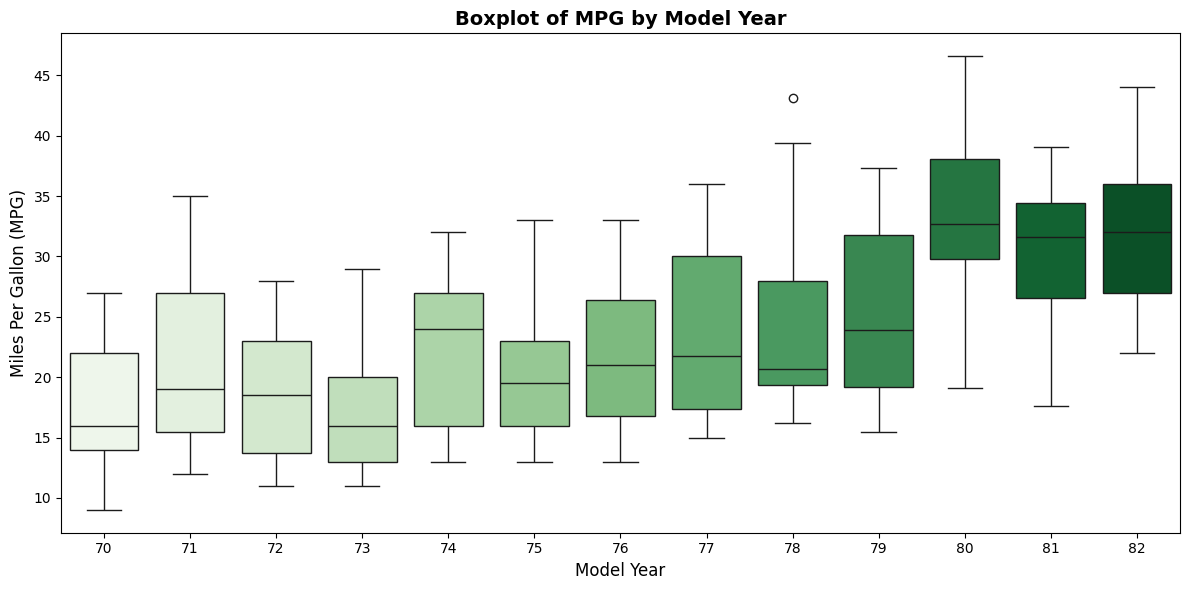

In [ ]:
# Define the color palette
palette = sns.color_palette("Greens", n_colors=len(cars['model_year'].unique()))

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cars, x='model_year', y='mpg', hue='model_year', palette=palette, legend=False)

# Add titles and labels
plt.title('Boxplot of MPG by Model Year', fontsize=14, weight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### **Question:**
Has the average mileage (MPG) changed significantly over the years (by `model_year`)?

---

### **Hypotheses:**

- **Null Hypothesis (H₀):**  
  The average MPG is the same for all model years.  
  H₀: Mean MPG does not vary by model year.

- **Alternative Hypothesis (H₁):**  
  At least one model year has a different average MPG.  
  H₁: Mean MPG varies by model year.

---

### **Plan for Analysis:**
1. Perform **One-Way ANOVA** to compare the mean MPG across all `model_year` groups.
2. If significant, follow up with **Tukey’s HSD** to identify which years differ.
3. Create visualizations to explore trends over time.



In [ ]:
import seaborn as sns
import scipy.stats as stats

# Group the data by model year
groups = {year: cars[cars['model_year'] == year]['mpg'] for year in cars['model_year'].unique()}

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(*groups.values())

# Print the results
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: Average MPG differs for at least one model year.")
else:
    print("Fail to Reject the Null Hypothesis: Average MPG is the same across all model years.")


F-Statistic: 24.09
P-Value: 0.0000
Reject the Null Hypothesis: Average MPG differs for at least one model year.


### **Interpretation of the ANOVA Results:**

1. **F-Statistic: 24.09**  
   - The F-statistic is a ratio that compares the variation **between the group means** (i.e., `mpg` differences between model years) to the variation **within the groups** (i.e., `mpg` variability within each model year).  
   - A high F-statistic like 24.09 indicates that the differences between the means of the groups (model years) are much larger than the variability within the groups.

2. **P-Value: 0.0000**  
   - The p-value is practically 0, meaning there is an extremely low probability that the observed differences in mean `mpg` across model years occurred by random chance, assuming the null hypothesis is true.
   - Since the p-value is much smaller than the significance level (\(\alpha = 0.05\)), the result is statistically significant.

3. **Decision**:  
   - **Reject the Null Hypothesis (H₀)**: There is strong evidence to conclude that the average `mpg` is **not the same across all model years**.

4. **Conclusion**:  
   - The test indicates that `model_year` has a significant effect on `mpg`. In other words, cars from different model years tend to have significantly different average mileage.

---

### **Next Steps**:
1. **Post-Hoc Analysis**:
   - Perform **Tukey’s HSD** test to identify which specific model years differ significantly in average `mpg`.

2. **Visualize Trends**:
   - Create a line plot or barplot to visualize how `mpg` has changed across model years.



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=cars['mpg'], groups=cars['model_year'], alpha=0.05)

# Print the results
print(tukey)

# Extract Tukey results into a DataFrame
tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])

# Clean up column names
tukey_results.columns = ['Group 1', 'Group 2', 'Mean Diff', 'Lower CI', 'Upper CI', 'P-Value', 'Reject']

# Display the results
# tukey_results


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    70     71   3.5603 0.5622 -1.7376  8.8583  False
    70     72   1.0246    1.0 -4.2733  6.3226  False
    70     73  -0.5897    1.0 -5.4665  4.2872  False
    70     74    5.014 0.0913 -0.3336 10.3617  False
    70     75    2.577 0.9128 -2.6303  7.7843  False
    70     76   3.8839 0.3375 -1.1706  8.9384  False
    70     77   5.6853  0.023  0.3874 10.9833   True
    70     78   6.3715 0.0018   1.382 11.3609   True
    70     79   7.4034 0.0003  2.1522 12.6547   True
    70     80  16.0069    0.0 10.7556 21.2581   True
    70     81  12.6448    0.0  7.3936 17.8961   True
    70     82    14.02    0.0  8.8542 19.1859   True
    71     72  -2.5357 0.9347 -7.8799  2.8085  False
    71     73    -4.15 0.2028 -9.0771  0.7771  False
    71     74   1.4537 0.9996 -3.9398  6.8472  False
    71     75  -0.9833    1.0 -6.2377   4.271 

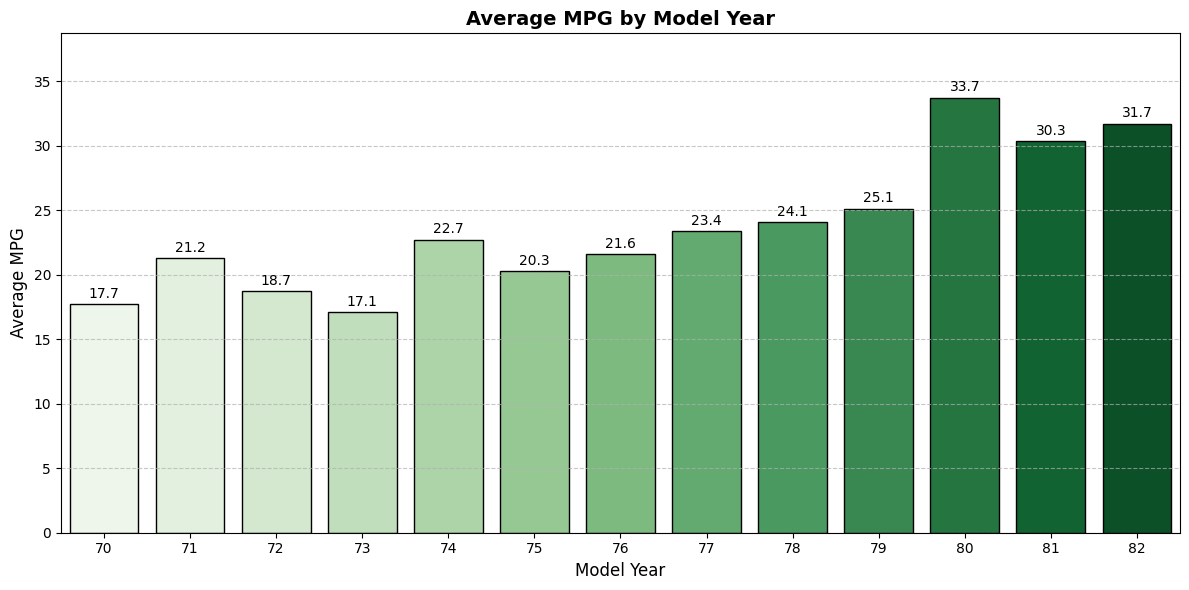

In [ ]:
# Calculate the means
data = cars.groupby('model_year', observed=True)['mpg'].mean().reset_index()

# Define the palette
palette = sns.color_palette("Greens", n_colors=len(data))

# Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='model_year', y='mpg', hue='model_year', palette=palette, edgecolor='black', legend=False)

# Add data labels
for index, row in data.iterrows():
    plt.text(x=index, y=row['mpg'] + 0.5, s=f"{row['mpg']:.1f}", ha='center', fontsize=10)

# Add titles and labels
plt.title('Average MPG by Model Year', fontsize=14, weight='bold')
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Average MPG', fontsize=12)
plt.ylim(0, data['mpg'].max() + 5)  # Adjust the y-axis to make room for labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()




### **Analysis of MPG Differences Between Earliest and Latest Model Years**

#### **1. Levene's Test for Equality of Variances**
- **Purpose**: Levene's test checks whether the variances of MPG distributions in the earliest and latest model years are equal.
- **Results**:
  - Test Statistic: **0.02**
  - P-Value: **0.8983**
- **Interpretation**:
  - The p-value is much greater than the significance level (\(\alpha = 0.05\)).
  - We fail to reject the null hypothesis, meaning the variances are not significantly different.
  - As a result, we proceeded with a **standard t-test**, assuming equal variances.

---

#### **2. T-Test for Mean Differences**
- **Purpose**: The t-test compares the mean MPG between the earliest and latest model years.
- **Results**:
  - T-Statistic: **-10.11**
  - P-Value: **0.0000**
- **Interpretation**:
  - The p-value is far below the significance level (\(\alpha = 0.05\)), indicating a highly significant difference in mean MPG.
  - The negative t-statistic suggests that the mean MPG in the earliest year is **significantly lower** than in the latest year.
- **Conclusion**:
  - There is strong evidence that cars from the latest model year have significantly **higher MPG** compared to cars from the earliest model year.



In [ ]:
from scipy.stats import ttest_ind, levene

# Load the dataset
cars = sns.load_dataset('mpg')

# Extract data for the earliest and latest years
earliest_year = cars[cars['model_year'] == cars['model_year'].min()]['mpg']
latest_year = cars[cars['model_year'] == cars['model_year'].max()]['mpg']

# Perform Levene's Test for equal variances
levene_stat, levene_p = levene(earliest_year, latest_year)
print(f"Levene's Test Statistic: {levene_stat:.2f}, P-Value: {levene_p:.4f}")

# Check Levene's Test results
if levene_p < 0.05:
    print("Variances are significantly different. Proceeding with Welch's t-test.")
    equal_var = False
else:
    print("Variances are not significantly different. Proceeding with standard t-test.")
    equal_var = True

# Perform t-test
t_stat, p_value = ttest_ind(earliest_year, latest_year, equal_var=equal_var)
print(f"T-Test Statistic: {t_stat:.2f}, P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis: The mean MPG is significantly different between the two years.")
else:
    print("Fail to Reject the Null Hypothesis: The mean MPG is not significantly different between the two years.")


Levene's Test Statistic: 0.02, P-Value: 0.8983
Variances are not significantly different. Proceeding with standard t-test.
T-Test Statistic: -10.11, P-Value: 0.0000
Reject the Null Hypothesis: The mean MPG is significantly different between the two years.


### **Interpretation of the Results:**

---

#### **Levene's Test (For Equal Variances):**
- **Test Statistic:** 0.02  
- **P-Value:** 0.8983  
  - The p-value is much greater than the significance level (\(\alpha = 0.05\)), so we **fail to reject the null hypothesis**.
  - This means there is **no significant difference in variances** between the MPG distributions for the earliest and latest years.
  - Therefore, we can proceed with a **standard t-test**, assuming equal variances.

---

#### **T-Test (For Mean Differences):**
- **T-Statistic:** -10.11  
  - This large negative value indicates a strong difference in mean MPG, with the MPG of the earliest year being **lower** than the latest year.
- **P-Value:** 0.0000  
  - The p-value is effectively 0 and far below the significance level (\(\alpha = 0.05\)).
  - This means the observed difference in mean MPG between the two years is **highly significant**.

---

#### **Decision:**
- **Reject the Null Hypothesis (H₀):** There is strong evidence that the mean MPG is **not the same** between the earliest and latest years.

---

#### **Conclusion:**
- Cars from the **latest year** have a significantly **higher mean MPG** compared to cars from the **earliest year**.
- This reflects improvements in fuel efficiency over time, likely driven by advancements in technology, stricter regulations, and consumer demand for better mileage.



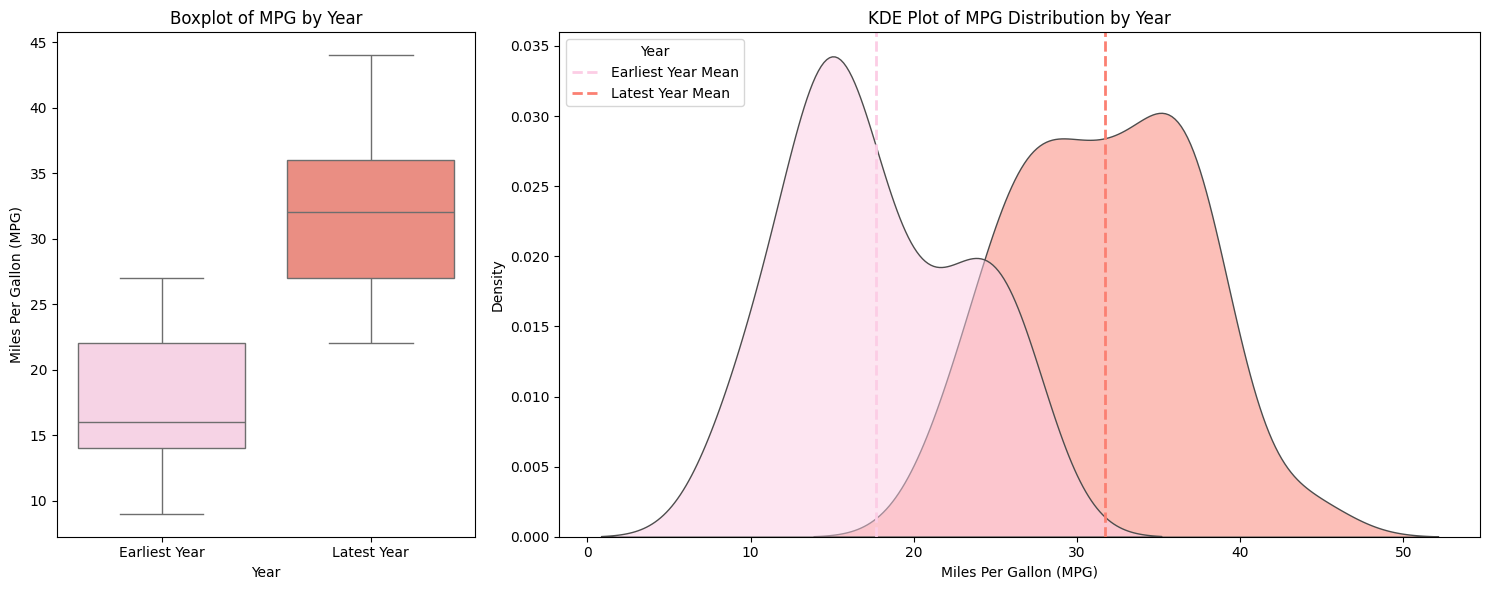

In [ ]:
from matplotlib.gridspec import GridSpec

# Extract data for the earliest and latest years
earliest_year = cars[cars['model_year'] == cars['model_year'].min()]
latest_year = cars[cars['model_year'] == cars['model_year'].max()]

# Combine the two datasets with a label for year
comparison_data = pd.concat([
    earliest_year.assign(Year="Earliest Year"),
    latest_year.assign(Year="Latest Year")
])

# Set up the figure with gridspec to divide into 1/3 and 2/3
fig = plt.figure(figsize=(15, 6))
gs = GridSpec(1, 3, width_ratios=[1, 2, 0])  # Third column is a placeholder

# Define the color palette
palette = sns.color_palette("Set3_r", n_colors=2)

# Plot 1: Boxplot (1/3 of the space)
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=comparison_data, x="Year", y="mpg", hue="Year", palette=palette, ax=ax1)
ax1.set_title("Boxplot of MPG by Year")
ax1.set_ylabel("Miles Per Gallon (MPG)")
ax1.set_xlabel("Year")

# Plot 2: KDE plot (2/3 of the space)
ax2 = fig.add_subplot(gs[1:])
sns.kdeplot(data=comparison_data, x="mpg", hue="Year", fill=True, palette=palette, alpha=0.5, ax=ax2, edgecolor="0.3")

# Add mean lines for each year
for year, color in zip(comparison_data['Year'].unique(), palette):
    mean_mpg = comparison_data[comparison_data['Year'] == year]['mpg'].mean()
    ax2.axvline(mean_mpg, color=color, linestyle="--", linewidth=2, label=f"{year} Mean")

ax2.set_title("KDE Plot of MPG Distribution by Year")
ax2.set_xlabel("Miles Per Gallon (MPG)")
ax2.set_ylabel("Density")

# Adjust the legend to avoid overlapping
ax2.legend(title="Year", loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()
